# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Левин Андрей БФИ2001
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [30]:
class Node:
    def __init__(self, index):
        self.index = index
        self.connections = []

    def __repr__(self):
        return f"{self.index}"

    def connect_to(self, node, cost, double = False):
        a = Connection(node, cost)
        self.connections.append(a)
        if double: 
            b = Connection(self, cost)
            node.connections.append(b)
            return [a, b]
        return [a]

    def remove_connections_to(self, node):
        i = 0
        r = []
        while i < len(self.connections):
            if self.connections[i].node == node:
                r.append(self.connections.pop(i))
                continue
            i+=1
        return r

    def remove_all_in_connections(self, nodes):
        r = []
        for n in nodes:
            r.extend([(n, c) for c in n.remove_connections_to(self)])
        return r

    def get_connection(self, to_node):
        for c in self.connections:
            if c.node == to_node:
                return c
        return None

class Connection:
    def __init__(self, to_node, cost):
        self.node = to_node
        self.cost = cost

class PathfindingResult:
    def __init__(self, total_cost, path):
        self.total_cost = total_cost
        self.path = path
    
    def __repr__(self):
        return  f'{self.path}'

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

In [55]:
f = open('C:/Users/Андрей/Desktop/GrPath.txt','r')
mas = [[int(n) for n in line.split()] for line in f.readlines()]
nodes = [Node(i) for i in range(1,len(mas)+1)]
for i in range(len(mas)):
    for j in range(len(mas)):
        if mas[i][j] > 0:
            nodes[i].connect_to(nodes[j], mas[i][j])
p=[(str(i+1),str(j+1),int(mas[i][j])) for i in range(len(mas)) for j in range(len(mas))if mas[i][j]!=0]  

In [56]:
# Алгоритм Флойда-Уоршелла
class FloydWarshall:
    class NodeState:
        def __init__(self, node):
            self.node = node
            self.to = dict()

    def calc_path(from_node, to_node, nodes):
        states = [FloydWarshall.NodeState(n) for n in nodes]
        def get_state_for(node):
            for s in states:
                if s.node == node:
                    return s
            return None
        for i in states:
            for c in i.node.connections:
                i.to[get_state_for(c.node)] = (c.cost, None)
        for k in states:
            for i in states:
                if k == i: continue
                for j in states:
                    if j == k or j == i: continue
                    a = i.to.get(k, (99999, None))[0]
                    b = k.to.get(j, (99999, None))[0]
                    s = a + b
                    if i.to.get(j, (99999, None))[0] > s:
                        i.to[j] = (s, k)
        from_state = get_state_for(from_node)
        to_state = get_state_for(to_node)
        path = []
        current = to_state
        while current is not None:
            path.append(current.node)
            current = from_state.to.get(current, (99999, None))[1]
        path.append(from_state.node)
        path.reverse()
        return PathfindingResult(from_state.to[to_state][0], path)

посторение пути из точки 1 в точку 8:
1->3->5->8


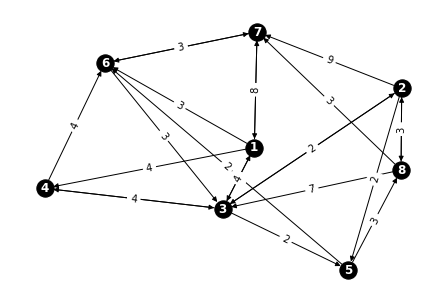

In [58]:
path=p
rez=FloydWarshall.calc_path(nodes[0],nodes[-1],nodes)
print(f'посторение пути из точки {nodes[0].index} в точку {nodes[-1].index}:')
rez=str(rez)[1:-1].split(', ')
Nrez=[]
for i in range(len(rez)-1):
    Nrez.append((str(rez[i])[-1:],(str(rez[i+1])[-1:]),0))  
print(nodes[0].index,'->',*[f'{Nrez[i][1]}->' for i in range(len(Nrez)-1)],nodes[-1].index,sep='')
G = nx.DiGraph() 
E = path
G.add_weighted_edges_from(E)
pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [59]:
# Алгоритм Дейкстры
class Dijkstra:
    class NodeState:
        def __init__(self, node, cost):
            self.node = node
            self.cost = cost
            self.best_from = None

    def calc_path(from_node, to_node, nodes):
        if from_node is None:
            print("'From' must be valid Node object")
            return
        if to_node is None:
            print("'To' must be valid Node object")
            return

        open = [Dijkstra.NodeState(from_node, 0)]
        close = []

        def get_min_open():
            min = open[0]
            for n in open:
                if n.cost < min.cost:
                    min = n
            return min
        def is_node_closed(node): return get_closed_state(node) is not None 
        def get_closed_state(node): return get_state_from_node(close, node)
        def get_opened_state(node): return get_state_from_node(open, node)
        def get_state_from_node(states, node):
            for n in states:
                if n.node == node:
                    return n
            return None
        def calc_costs_for_connections(origin_state):
            for connection in origin_state.node.connections:
                if is_node_closed(connection.node): continue
                node_state = get_opened_state(connection.node)
                if node_state is None:
                    node_state = Dijkstra.NodeState(connection.node, 9999999)
                    open.append(node_state)
                current_cost = origin_state.cost + connection.cost
                if current_cost < node_state.cost:
                    node_state.cost = current_cost
                    node_state.best_from = origin_state
        def create_result():
            destination_state = get_closed_state(to_node)
            path = []
            current = destination_state
            while current is not None:
                path.append(current.node)
                current = current.best_from
            path.reverse()
            return PathfindingResult(destination_state.cost, path)

        while len(open) > 0:
            current = get_min_open()
            calc_costs_for_connections(current)
            open.remove(current)
            close.append(current)

        return create_result()

посторение пути из точки 1 в точку 8:
1->3->5->8


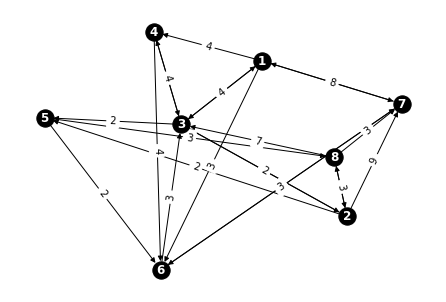

In [60]:
path=p
rez=Dijkstra.calc_path(nodes[0],nodes[-1],nodes)
print(f'посторение пути из точки {nodes[0].index} в точку {nodes[-1].index}:')
rez=str(rez)[1:-1].split(', ')
Nrez=[]
for i in range(len(rez)-1):
    Nrez.append((str(rez[i])[-1:],(str(rez[i+1])[-1:]),0))  
print(nodes[0].index,'->',*[f'{Nrez[i][1]}->' for i in range(len(Nrez)-1)],nodes[-1].index,sep='')
G = nx.DiGraph() 
E = path
G.add_weighted_edges_from(E)
pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [61]:
# Алгоритм Беллмана-Форда
class BellmanFord:
    def calc_path(from_node, to_node, nodes, raw = False):
        d = [[(99999, -1) for _ in range(len(nodes))] for _ in range(len(nodes))]
        d[nodes.index(from_node)][0] = (0, -1)

        for i in range(1, len(nodes)):
            for index_from in range(len(nodes)):
                for c in nodes[index_from].connections:
                    index_to = nodes.index(c.node)
                    s = d[index_from][i - 1][0] + c.cost
                    if d[index_to][i][0] > s:
                        d[index_to][i] = (s, index_from)

        if raw: return d

        min_path_len = 0
        min_path_cost = 99999
        to_node_index = nodes.index(to_node)
        for i in range(len(d[to_node_index])):
            if min_path_cost > d[to_node_index][i][0]:
                min_path_cost = d[to_node_index][i][0]
                min_path_len = i
        path = []
        current_node = to_node_index
        for i in range(min_path_len, 0, -1):
            path.append(nodes[current_node])
            current_node = d[current_node][i][1]
        path.append(from_node)
        path.reverse()
        return PathfindingResult(min_path_cost, path)

посторение пути из точки 1 в точку 8:
1->3->5->8


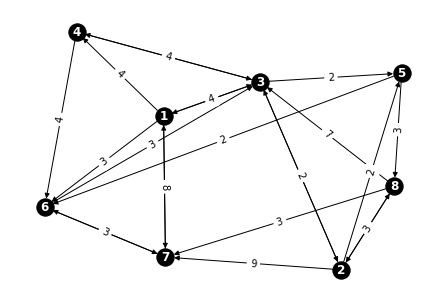

In [62]:
path=p
rez=BellmanFord.calc_path(nodes[0],nodes[-1],nodes)
print(f'посторение пути из точки {nodes[0].index} в точку {nodes[-1].index}:')
rez=str(rez)[1:-1].split(', ')
Nrez=[]
for i in range(len(rez)-1):
    Nrez.append((str(rez[i])[-1:],(str(rez[i+1])[-1:]),0))  
print(nodes[0].index,'->',*[f'{Nrez[i][1]}->' for i in range(len(Nrez)-1)],nodes[-1].index,sep='')
G = nx.DiGraph() 
E = path
G.add_weighted_edges_from(E)
pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [51]:
# Алгоритм Джонсона
class Johnson:
    def calc_path(from_node, to_node, nodes):
        temp_node = Node(-1)
        nodes.append(temp_node)
        for n in nodes:
            temp_node.connect_to(n, 0)
        
        bell_dist = BellmanFord.calc_path(temp_node, None, nodes, raw=True)
        
        for i in range(len(nodes)):
            for c in nodes[i].connections:
                c.cost += bell_dist[i][-1][0] - bell_dist[nodes.index(c.node)][-1][0]
        
        nodes.pop()

        result = Dijkstra.calc_path(from_node, to_node, nodes)
        result.total_cost += bell_dist[nodes.index(from_node)][-1][0] - bell_dist[nodes.index(to_node)][-1][0]

        for i in range(len(nodes)):
            for c in nodes[i].connections:
                c.cost += -bell_dist[i][-1][0] + bell_dist[nodes.index(c.node)][-1][0]
        
        return result


посторение пути из точки 1 в точку 8:
1->3->5->8


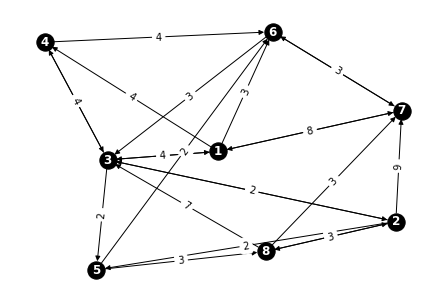

In [63]:
path=p
rez=Johnson.calc_path(nodes[0],nodes[-1],nodes)
print(f'посторение пути из точки {nodes[0].index} в точку {nodes[-1].index}:')
rez=str(rez)[1:-1].split(', ')
Nrez=[]
for i in range(len(rez)-1):
    Nrez.append((str(rez[i])[-1:],(str(rez[i+1])[-1:]),0))  
print(nodes[0].index,'->',*[f'{Nrez[i][1]}->' for i in range(len(Nrez)-1)],nodes[-1].index,sep='')
G = nx.DiGraph() 
E = path
G.add_weighted_edges_from(E)
pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [41]:
# Алгоритм Левита
from collections import deque

class Levit:
    class NodeState:
        def __init__(self, node, cost, status):
            self.node = node
            self.cost = cost
            self.previous = None
            self.status = status
    
    def calc_path(from_node, to_node, nodes):
        states = {}
        for n in nodes:
            states[n] = Levit.NodeState(n, 
                0 if n == from_node else 99999,
                1 if n == from_node else 2)
        
        q = deque([states[from_node]])

        while q:
            current = q.pop()
            current.status = 0
            for c in current.node.connections:
                to_state = states[c.node]
                if to_state.cost > current.cost + c.cost:
                    to_state.cost = current.cost + c.cost
                    if to_state.status == 2:
                        q.appendleft(to_state)
                    elif to_state.status == 0:
                        q.append(to_state)
                    to_state.previous = current
                    to_state.status = 1

        destination_state = states[to_node]
        path = []
        current = destination_state
        while current is not None:
            path.append(current.node)
            current = current.previous
        path.reverse()
        return PathfindingResult(destination_state.cost, path)

посторение пути из точки 1 в точку 8:
1->3->5->8


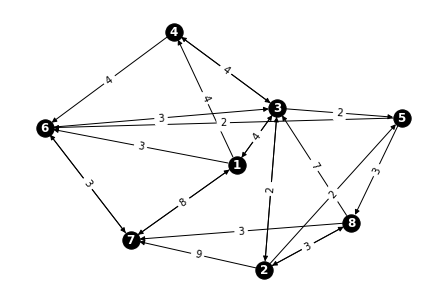

In [64]:
path=p
rez=Levit.calc_path(nodes[0],nodes[-1],nodes)
print(f'посторение пути из точки {nodes[0].index} в точку {nodes[-1].index}:')
rez=str(rez)[1:-1].split(', ')
Nrez=[]
for i in range(len(rez)-1):
    Nrez.append((str(rez[i])[-1:],(str(rez[i+1])[-1:]),0))  
print(nodes[0].index,'->',*[f'{Nrez[i][1]}->' for i in range(len(Nrez)-1)],nodes[-1].index,sep='')
G = nx.DiGraph() 
E = path
G.add_weighted_edges_from(E)
pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [43]:
# Алгоритм Йена
class Yen:
    def calc_path(from_node, to_node, nodes, count = 0):
        initial_path = Dijkstra.calc_path(from_node, to_node, nodes)
        paths = [initial_path]
        B = []

        for k in range(1, count + 1):
            for i in range(len(paths[k - 1].path) - 2):
                removed_connections = []
                temp_nodes = nodes.copy()
                spur_node = paths[k - 1].path[i]
                root_path = paths[k - 1].path[0:i]

                for p in paths:
                    if root_path == p.path[0:i]:
                        removed = p.path[i].remove_connections_to(p.path[i + 1])
                        removed_connections.extend([(p.path[i], c) for c in removed])
                
                for n in root_path:
                    if n == spur_node: continue
                    removed = n.remove_all_in_connections(temp_nodes)
                    removed_connections.extend(removed)
                    temp_nodes.remove(n)
                
                spur_path = Dijkstra.calc_path(spur_node, to_node, temp_nodes)
                total_path = root_path + spur_path.path

                cost = 0
                for i in range(len(total_path) - 1):
                    c = total_path[i].get_connection(total_path[i + 1])
                    cost += c.cost

                if (cost, total_path) not in B:
                    B.append((cost, total_path))
                
    

            if len(B) == 0: break
            shortest_path_cost = 999999
            shortest_path_index = 0
            for i in range(len(B)):
                if shortest_path_cost > B[i][0]:
                    shortest_path_cost = B[i][0]
                    shortest_path_index = i
            
            paths.append(PathfindingResult(B[shortest_path_index][0], B[shortest_path_index][1]))
            B.pop(shortest_path_index)
        
        return paths


посторение пути из точки 1 в точку 8:
1->3->5->8


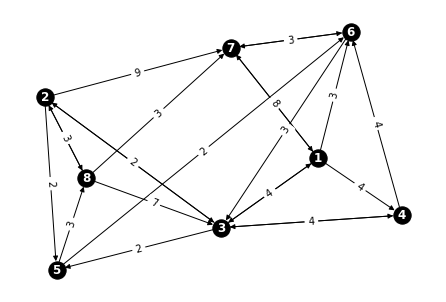

In [65]:
path=p
rez=Yen.calc_path(nodes[0],nodes[-1],nodes)[0]
print(f'посторение пути из точки {nodes[0].index} в точку {nodes[-1].index}:')
rez=str(rez)[1:-1].split(', ')
Nrez=[]
for i in range(len(rez)-1):
    Nrez.append((str(rez[i])[-1:],(str(rez[i+1])[-1:]),0))  
print(nodes[0].index,'->',*[f'{Nrez[i][1]}->' for i in range(len(Nrez)-1)],nodes[-1].index,sep='')
G = nx.DiGraph() 
E = path
G.add_weighted_edges_from(E)
pos=nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [66]:
import time
from IPython.display import HTML, display
data =[
    ['','Флойда-Уоршелла','Дейкстры','Беллмана-Форда','Джонсона',
    'Левита','Йена'],
    ['Точек: 5   ',0,0,0,0,0,0,],
    ['Точек: 10  ',0,0,0,0,0,0,],
    ['Точек: 15  ',0,0,0,0,0,0,],
    ['Точек: 20  ',0,0,0,0,0,0,],
    ['Точек: 25  ',0,0,0,0,0,0,],
]
nodesMas=[]
pathMas=['C:/Users/Андрей/Desktop/GrPath1.txt','C:/Users/Андрей/Desktop/GrPath2.txt','C:/Users/Андрей/Desktop/GrPath3.txt',
         'C:/Users/Андрей/Desktop/GrPath4.txt','C:/Users/Андрей/Desktop/GrPath5.txt']
for i in range(0,5):
    f = open(pathMas[i],'r')
    mas = [[int(n) for n in line.split()] for line in f.readlines()]
    nodes = [Node(i) for i in range(1,len(mas)+1)]
    for i in range(len(mas)):
        for j in range(len(mas)):
            if mas[i][j] > 0:
                nodes[i].connect_to(nodes[j], mas[i][j])
    nodesMas.append(nodes) 

def benchmark_pathfinding():
    for i in range(0, 5):

        start_time = time.time()
        FloydWarshall.calc_path(nodesMas[i][0], nodesMas[i][-1],nodesMas[i])
        total_time = round((time.time() - start_time)*1000)
        data[i+1][1]=f"{total_time}ms"
        
        start_time = time.time()
        Dijkstra.calc_path(nodes[0], nodes[-1], nodes)
        total_time = round((time.time() - start_time)*1000)
        data[i+1][2]=f"{total_time}ms"
    
        start_time = time.time()
        BellmanFord.calc_path(nodes[0], nodes[-1], nodes)
        total_time = round((time.time() - start_time)*1000)
        data[i+1][3]=f"{total_time}ms"
        
        start_time = time.time()
        Johnson.calc_path(nodes[0], nodes[-1], nodes)
        total_time = round((time.time() - start_time)*1000)
        data[i+1][4]=f"{total_time}ms"
    
        start_time = time.time()
        Levit.calc_path(nodes[0], nodes[-1], nodes)
        total_time = round((time.time() - start_time)*1000)
        data[i+1][5]=f"{total_time}ms"
    
        start_time = time.time()
        Yen.calc_path(nodes[0], nodes[-1], nodes)
        total_time = round((time.time() - start_time)*1000)
        data[i+1][6]=f"{total_time}ms"

benchmark_pathfinding()
              
print('Время выполнения алгоритмов в зависимости от числа узлов и ребер графа: ')    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

Время выполнения алгоритмов в зависимости от числа узлов и ребер графа: 


,Флойда-Уоршелла,Дейкстры,Беллмана-Форда,Джонсона,Левита,Йена
Точек: 5,0ms,1ms,8ms,12ms,0ms,1ms
Точек: 10,1ms,1ms,9ms,10ms,0ms,1ms
Точек: 15,2ms,0ms,8ms,11ms,0ms,2ms
Точек: 20,3ms,1ms,8ms,9ms,1ms,0ms
Точек: 25,8ms,1ms,7ms,10ms,0ms,1ms


### Вывод